<a href="https://colab.research.google.com/github/L16Aya/ap155_OUTPUTS/blob/main/Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

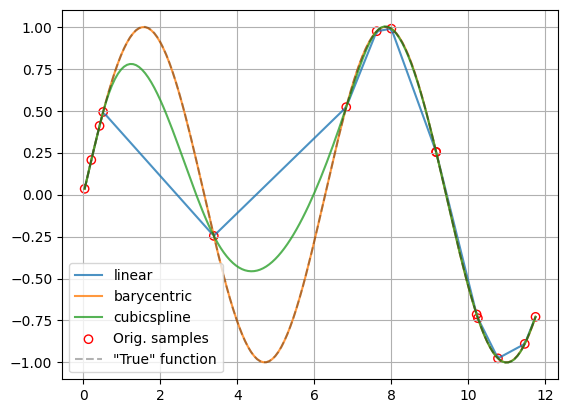

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

rng = np.random.default_rng(0)

N_samp = 15
x_sample = rng.uniform(low=0, high=4*np.pi, size=N_samp)
y_sample = np.sin(x_sample)

x_sample, unique_indices = np.unique(x_sample, return_index=True)
y_sample = y_sample[unique_indices]

approx_x = np.linspace(min(x_sample), max(x_sample), 10*N_samp)

intrp_methods = ['linear', 'barycentric', 'cubicspline']

fig, ax = plt.subplots()

for meth in intrp_methods:
    if meth == 'barycentric':
        interp_func = interpolate.BarycentricInterpolator(x_sample, y_sample)
        approx_y = interp_func(approx_x)
    elif meth == 'cubicspline':
        cs = interpolate.CubicSpline(x_sample, y_sample, bc_type='natural')
        approx_y = cs(approx_x)
    else:
        interp_func = interpolate.interp1d(x_sample, y_sample, kind=meth)
        approx_y = interp_func(approx_x)

    ax.plot(approx_x, approx_y, label=meth, alpha=0.8)

ax.scatter(x_sample, y_sample, facecolors='none', edgecolor='red', label="Orig. samples")
ax.plot(approx_x, np.sin(approx_x), "k--", alpha=0.3, label='"True" function')

ax.grid(True)
ax.legend(loc='best')
plt.show()


In [32]:
from google.colab import files

uploaded = files.upload()

Saving y_values.txt to y_values.txt


y_values range: 6547.05 to 14164.53


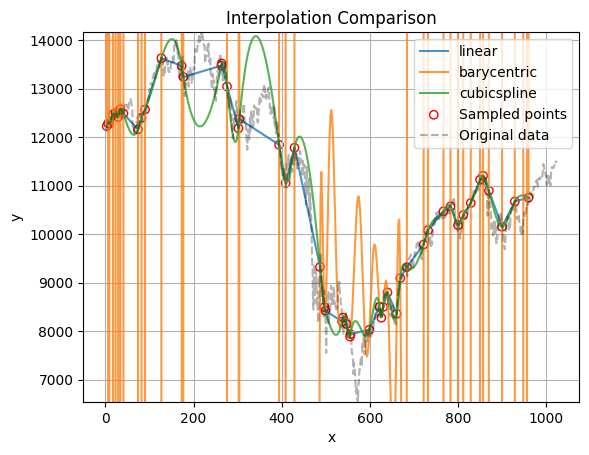

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

y_values = np.loadtxt("y_values.txt")
x_values = np.arange(1, len(y_values) + 1)

rng = np.random.default_rng(0)
N_samp = int(0.05 * len(y_values))
indices = rng.choice(len(x_values), size=N_samp, replace=False)

x_sample = x_values[indices]
y_sample = y_values[indices]

sort_idx = np.argsort(x_sample)
x_sample = x_sample[sort_idx]
y_sample = y_sample[sort_idx]

approx_x = np.linspace(min(x_sample), max(x_sample), 10 * N_samp)

intrp_methods = ['linear', 'barycentric', 'cubicspline']

fig, ax = plt.subplots()

for meth in intrp_methods:
    if meth == 'barycentric':
        interp_func = interpolate.BarycentricInterpolator(x_sample, y_sample)
        approx_y = interp_func(approx_x)
    elif meth == 'cubicspline':
        cs = interpolate.CubicSpline(x_sample, y_sample, bc_type='natural')
        approx_y = cs(approx_x)
    else:
        interp_func = interpolate.interp1d(x_sample, y_sample, kind=meth)
        approx_y = interp_func(approx_x)

    ax.plot(approx_x, approx_y, label=meth, alpha=0.8)

ax.scatter(x_sample, y_sample, facecolors='none', edgecolor='red', label="Sampled points")
ax.plot(x_values, y_values, "k--", alpha=0.3, label="Original data")

ax.grid(True)
ax.legend(loc='best')
print("y_values range:", np.min(y_values), "to", np.max(y_values))
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(6547.05,14164.53)
plt.title("Interpolation Comparison")
plt.show()
